In [ ]:
'''

Module 1 : Uber Spatial Analysis
            Lec 1 : Working with Shape files !
            Lec 2 : Key terms used in Spatial analysis (lat & lon  , point vs polygon , Coordinate Reference Systems (CRS))
    

Module 2 : Uber Interactive Geospatial Data Viz 

            Lec 1 : Analysing Busiest Pickup Zones !
            Lec 2 : Creating Bubble-Map viz
            Lec 3 : Marker Cluster Analysis ?
            Lec 4 : Which Zone have highest Uber demand ?


Module 3 : Advanced Spatial Analysis

            Lec 1 : Uber Demand over time
            Lec 2 : Export plots to HTML / Save plots !
            Lec 3 : Animated plots of rush hours
            

'''

# 1.. Working with shapefiles !

In [64]:
'''

A shapefile is a file that stores map shapes and location information..
A shapefile doesn’t store map images — it stores geometric coordinates that draw points, lines or polygons on the Earth..


It usally stores 3 types of geometry :

Point Geometry
    one coordinate (like Uber pickup locations 📍)
    
Line geometry 
    A line is made of many connected points that form a path (like Roads , rivers 🛣️)
    Point A → Point B → Point C → Point D
    Paths or Routes are stored as lines in shapefiles
    
Polygons geometry
    Closed area or neighbourhood are stored as "Polygon" in shapefiles
    (like neighborhoods , districts or taxi zones 🗺️)


🧩 What Does It Store ?
| Type         | Example                                                 |
| ------------ | ------------------------------------------------------  |
| **Points**   | Uber pickup locations 📍                               |
| **Lines**    | Roads, rivers 🛣️                                       |
| **Polygons** | Areas like neighborhoods, districts, or taxi zones 🗺️  |



In your Uber project, the shapefile stores NYC taxi zones, which are polygons (area boundaries).




'''

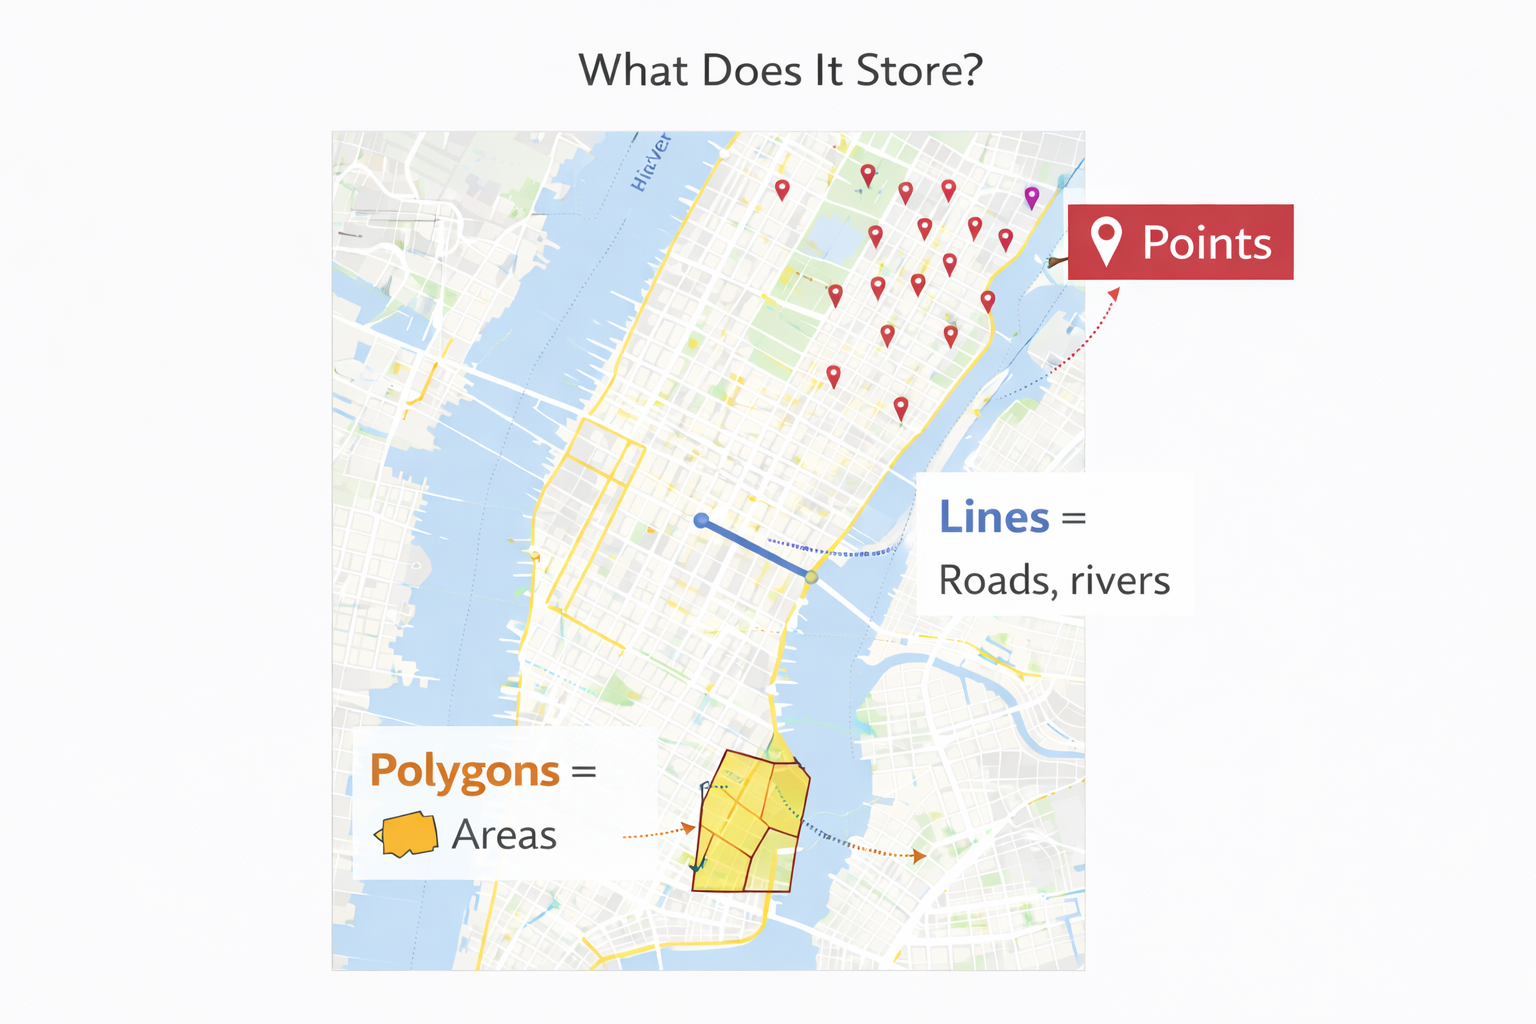

In [ ]:
'''

If u want to work with geographic shape data and perform map-based analysis..
Thats where geopandas comes !


'''

In [21]:
# !pip install geopandas
# geopandas-1.1.2

In [226]:
import geopandas as gpd

zones = gpd.read_file(r"R:\All_Datasets\Data_Analysis_Projects\Uber\taxi_zones/taxi_zones.shp")

In [227]:
zones.head(3)

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   

  borough                                           geometry  
0     EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1  Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2   Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...

In [ ]:
'''

This file is a digital map of NYC divided into Uber taxi zones, 
where each row stores the name, borough, ID, and the actual boundary shape of that area


'''

In [ ]:
'''

| Column       | Meaning                  |
| ------------ | ------------------------ |
| `LocationID` | Taxi zone ID             |
| `borough`    | Manhattan, Brooklyn, etc |
| `zone`       | Zone name / neighborhood |
| 'geometry'   | The actual shape of the zone on the map(polygon or multipolygon) 🗺️       |




| **Shape_Leng** | The **perimeter length** of the zone boundary (measured in map units, not very useful for basic analysis) |
| **Shape_Area** | The **area size** of the zone (again in map units, depends on CRS)                                        |



'''

In [ ]:
'''

Boroughs are the 5 main big regions that make up New York City..

| Borough           | What It’s Like                | Why It Matters for Uber               |
| ----------------- | ----------------------------- | ------------------------------------- |
| **Manhattan**     | Skyscrapers, offices, tourism | 🚕 Highest ride demand                |
| **Brooklyn**      | Residential + trendy areas    | Growing pickup demand                 |
| **Queens**        | Residential + airports        | Airport trips (JFK, LGA)              |
| **Bronx**         | Mostly residential            | Lower Uber activity (in this dataset) |
| **Staten Island** | Suburban, less dense          | Very low demand                       |




'''

In [ ]:
'''

We have successfully loaded data , In the next session, we’ll cover some essential basics of spatial analysis 
that will help us create map-based visualizations and perform spatial analysis effectively !

'''

# 2.. Key terms used in Spatial analysis 
       

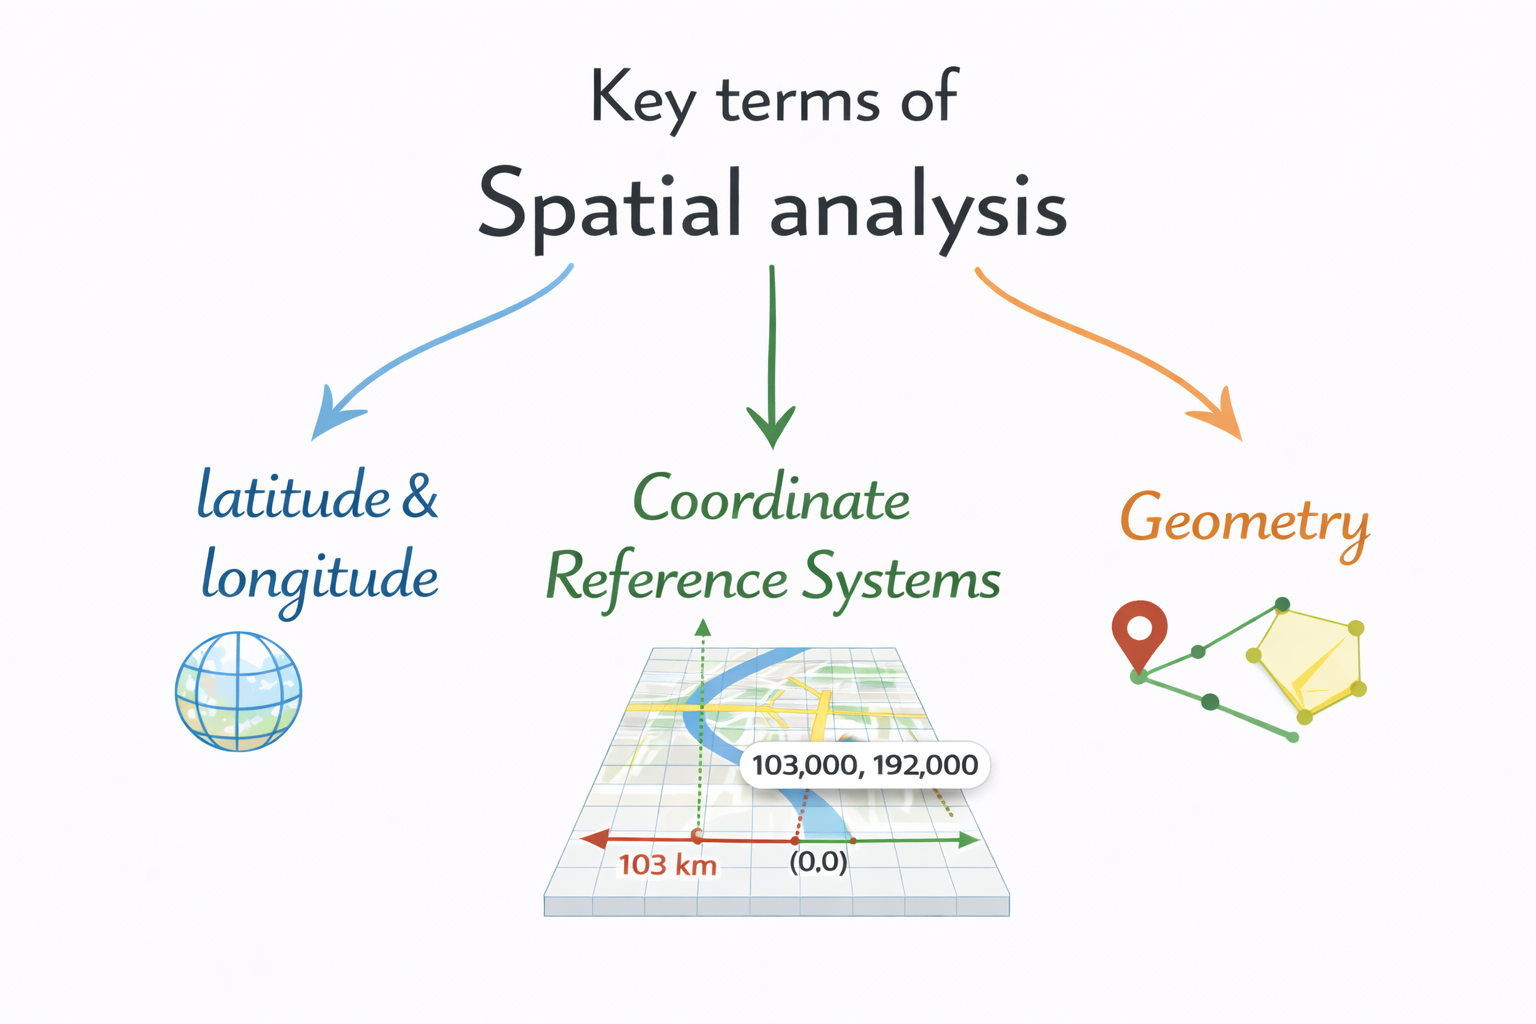

In [ ]:
'''
While working on this data , you will see these Big numbers (933100.918 , 192536.086) which helps u to create map-based plots..

So lets understand what these numbers are !

and In order to understand what this data is or what these numbers are ?
U need to know some Key terms of Spatial Analysis like :

    1 ) Latitude & longitude
    2 ) Coordinates Reference Systems
    3 ) Geometry

Very first Lets first understand what Latitudes & Longitudes are !

'''

In [ ]:
'''

#### definition of latitudes & Longitudes :

    Every place on Earth can be located using a unique pair of numbers called coordinates (Lat , Lon) :
    These coordinates are useful for maps, GPS, navigation and to perform Geographical analysis..
    
    
    Before understanding what latitude & Longitude are , we need to know two important imaginary reference lines on Earth:
    (From Globe) , which help us to measure positions on specific location on Earth..
      🧭 The Earth has two important imaginary reference lines :

         Equator → A horizontal line around the middle of the Earth
         Prime Meridian → A vertical line running from the North Pole to the South Pole through Greenwich, England
                          
        
        
    📏 How the Globe Is Divided

        The globe is divided into 2 degrees of measurement :
        360° around the Earth (east ↔ west) → These are Longitude measurements
        180° from top to bottom (north ↕ south) → These are Latitude measurements

 
    
        🧭 What is Longitude ?

            The lines that run from the North Pole to the South Pole are called Longitude lines..
            They measure how far a place is east or west of the Prime Meridian..
            📍 Example : New York has a longitude around 74° West
        
        
        🌎 What is Latitude?

            The lines that run around the Earth from east to west are called Latitude lines.
            They measure how far a place is north or south of the Equator.
            📍 Example: New York has a latitude around 40° North
            
            
        🧭 Easy Trick to Remember

        Latitude = Ladder → goes across (east–west)
        Longitude = Long lines → go top to bottom (north–south)


'''

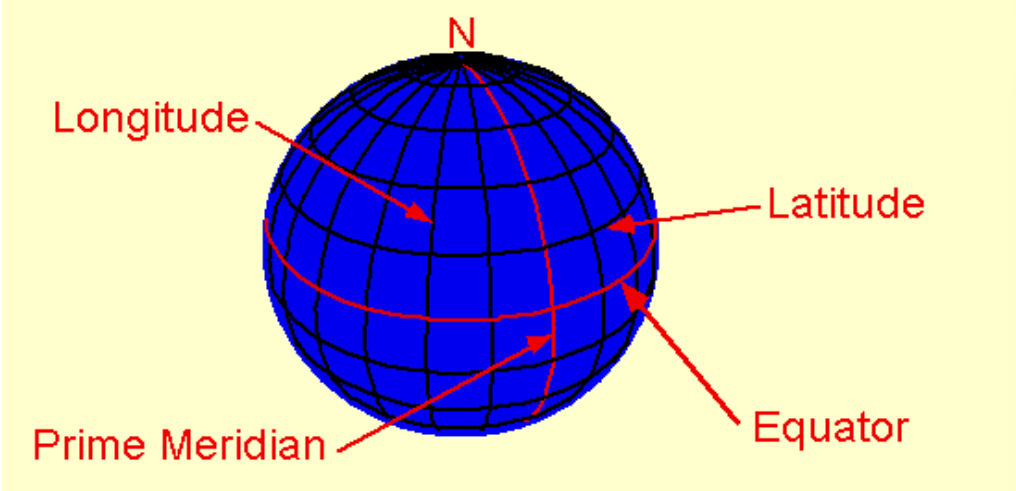

In [ ]:
'''

What is Coordinate Reference Systems (CRS) ?
A CRS is a system that tells us how locations on Earth are measured and represented as numbers.

'''

In [ ]:
'''


There are 2 different ways to describe locations on Earth..


| Type                        | Used For               | Coordinates Looks Like :           |
| ---------------------       | ---------------------- | ---------------------------------  |
| 🌐 Geographic CRS (Lat/Lon)| GPS, web maps          | Small numbers (-73.98, 40.75)      |
| 📏 Projected CRS           | Accurate distance/area | Big numbers (like 103000, 192000)  |



In simple terms , coordinate (103000, 192000) means that location is 103 km east and 192 km north in a flat map grid , 

'''

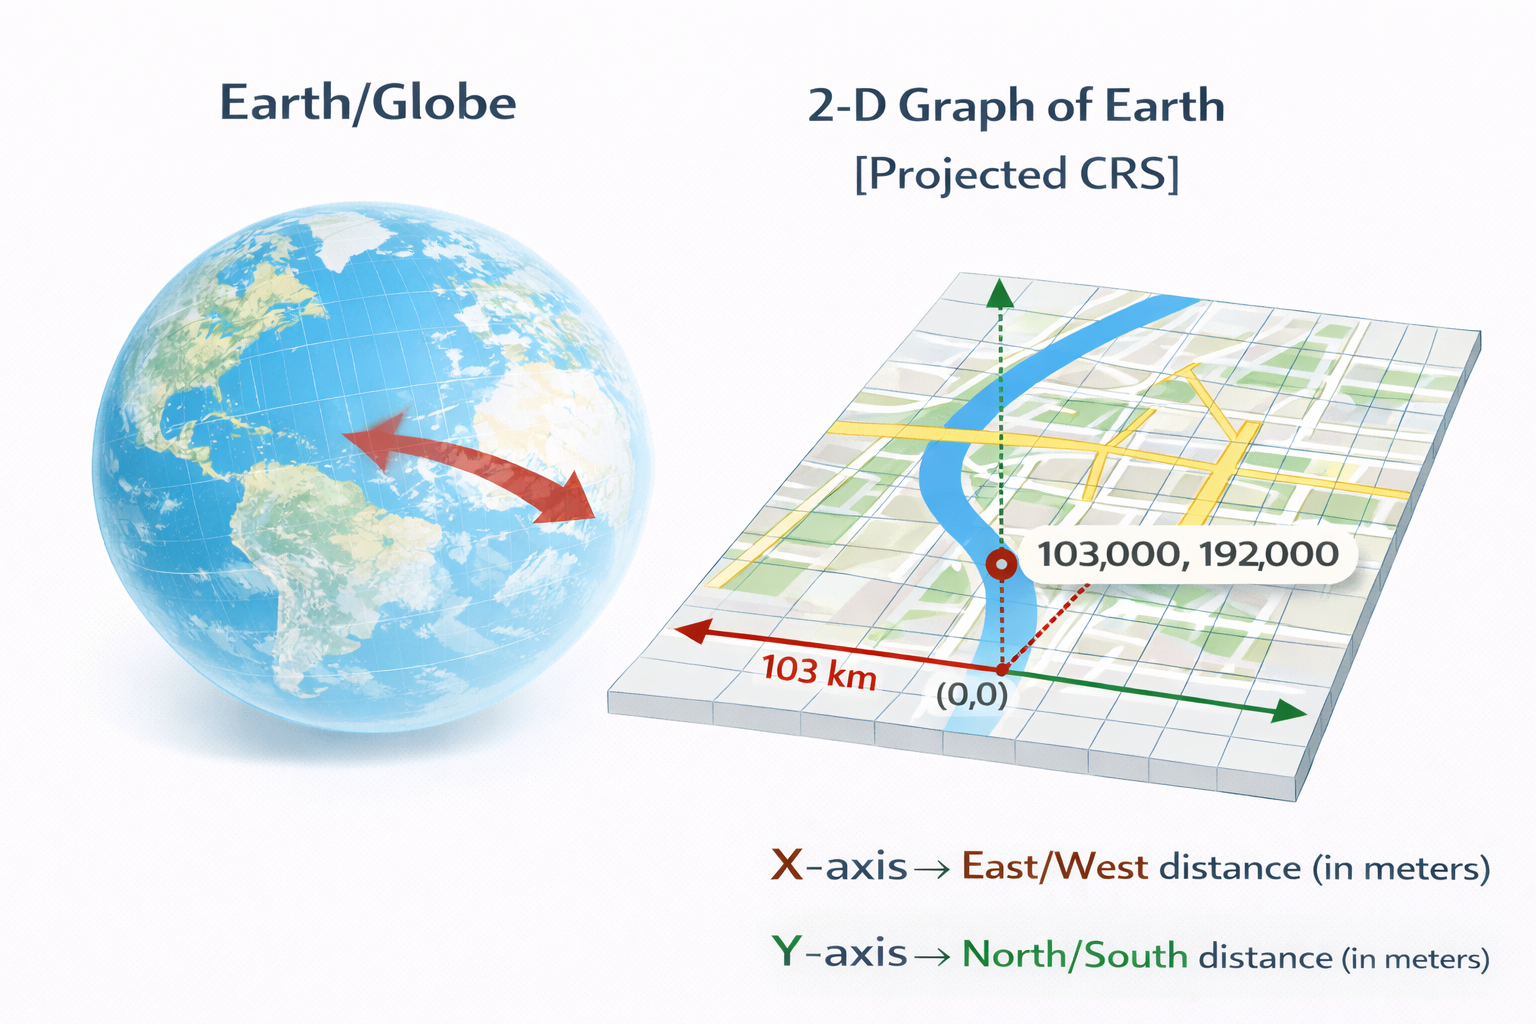

In [ ]:
'''
Lets understand what is Projected CRS ?

Projected CRS : is a 2D representation of locations on Earth..

Instead of curved Earth angles (lat/lon), we place a flat grid over the map.
where Every place is described like a point on graph paper
🗺️ Think of It Like a City Map Grid

    X-axis → East/West distance(in metres)
    Y-axis → North/South distance

Each location is described by how far it is from the reference point of that grid.
That’s what those big numbers mean..


Note : reference point is not the Equator or Prime Meridian , it is often defined by that projection..

'''

In [ ]:
'''

🌍 Why to Use This Projected CRS Instead of Lat/Lon?

Because meters are easier for measurement..
With projected CRS you can directly calculate :

Distance between two points
Area of a zone



If you tried that with latitude/longitude, results would be inaccurate.



'''

In [228]:
zones = zones.to_crs(epsg = 4326)  # convert map’s coordinate system into Latitude & Longitude.
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((-74.18445 40.695, -74.18449 40.6951,...  
1         Queens  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...  
2          Bronx  POLYGON ((-73.84793 40.87134, -73.84725 40.870...  
3      Manhattan  POLYGON ((-73.97177 40.72582, -73.97179 40.725...  
4  Staten Island  POLYGON ((-74.17422 40.56257, -74.17349 40.562...

In [ ]:
'''

EPSG:4326?

It’s the standard GPS coordinate system used by:

Google Maps
Uber
Folium

Almost all web maps




103269, 172126  ❌ not GPS-style
After conversion to EPSG:4326:

-73.98, 40.75  ✅ Real-world GPS coordinates


'''

In [ ]:
'''
What is Geometry ?
Geometry means the shape of a location on a map.

It tells the computer:
“What does this thing look like on the Earth?”

There are 3 types of Geometry in simple words :
    point Geometry vs Line Geometry vs polygon Geometry


'''

In [ ]:
'''

| Geometry Type | What is Stored                         | Real Example    |
| ------------- | -------------------------------------- | --------------- |
| Point         | One coordinate                         | Pickup location |
| Line          | Many connected coordinates             | Road            |
| Polygon       | Many coordinates forming a closed area | Taxi zone       |



'''

In [ ]:
'''

🧠 In GIS Terms

        Points = one coordinate
        Point Geometry is just one point 📍on Earth..
        
        Lines (Polylines) = They are a collection of multiple connected coordinates forming a path or "route"

        Polygons
        Polygon = [(x1, y1), (x2, y2), (x3, y3), ..., (xn, yn)]
        Polygon is a collection multiple pairs of (lat,lon) which forms closed shape..



'''

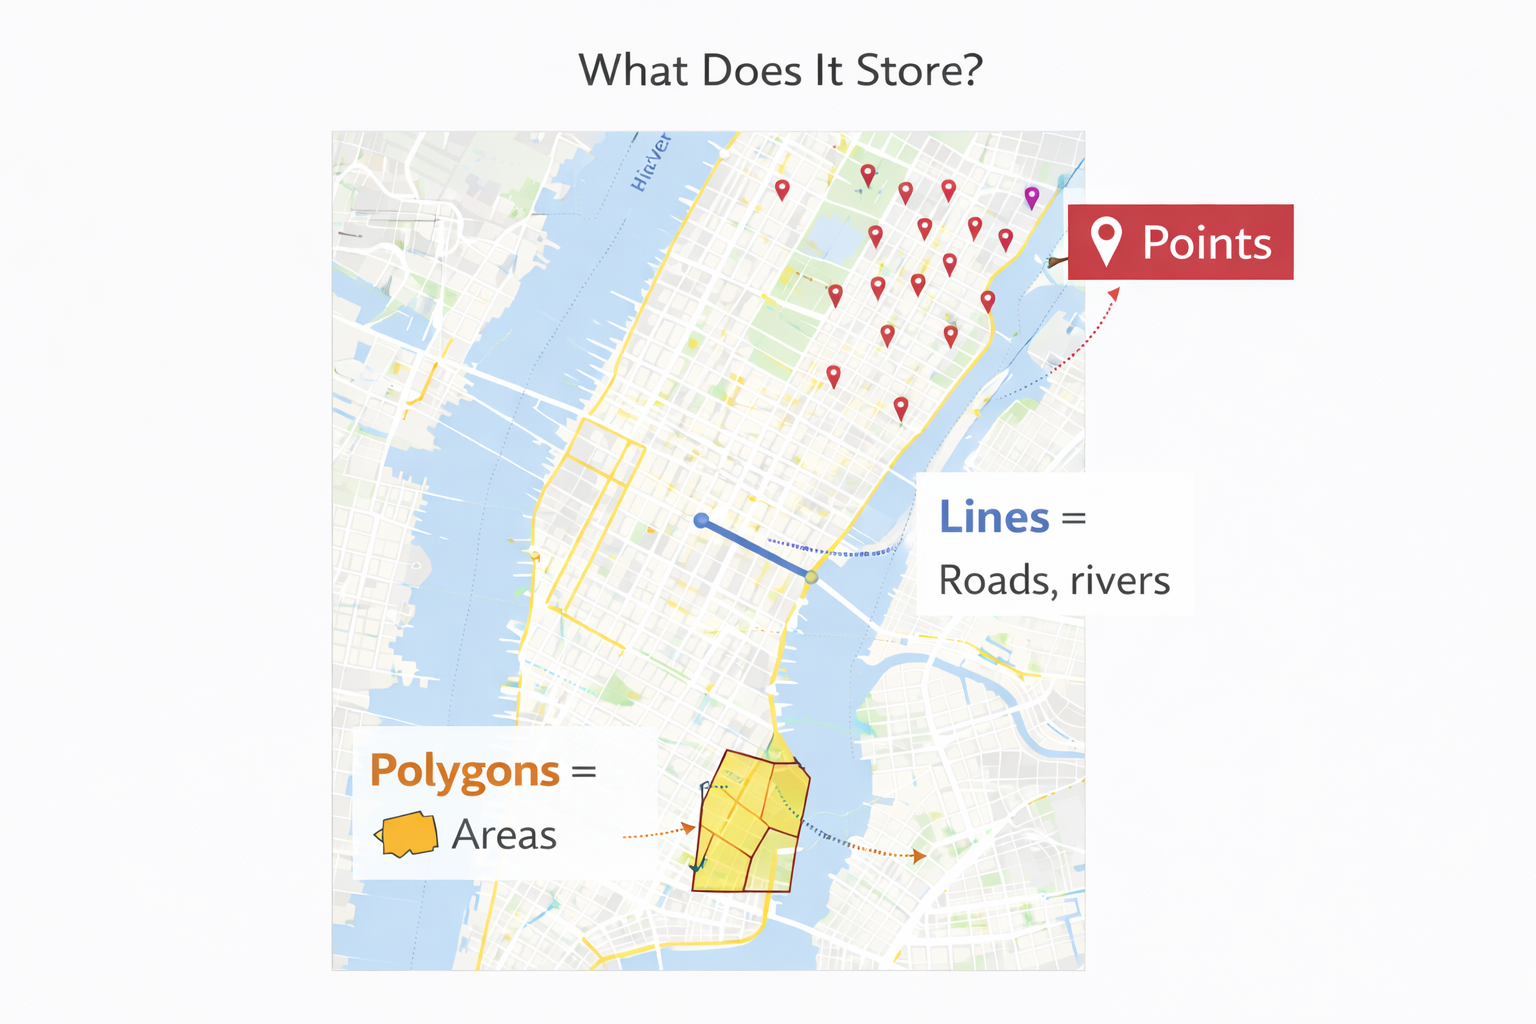

In [146]:
zones.head(2)

OBJECTID  Shape_Leng  Shape_Area            zone  LocationID borough  \
0         1    0.116357    0.000782  Newark Airport           1     EWR   
1         2    0.433470    0.004866     Jamaica Bay           2  Queens   

                                            geometry  
0  POLYGON ((-74.18445 40.695, -74.18449 40.6951,...  
1  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...

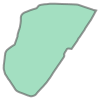

In [145]:
zones["geometry"][0]

## zone/boundary of "Newark Airport"

In [ ]:
'''

Instead of:
❌ “That’s all for this video.”

Use ✔ momentum endings:
    ✔ Curiosity for next lesson




Now you’ve learned the basic terminology of spatial analysis which you can use to create tones of such interactive 
map based viz like Choropleth maps , Bubble maps , Heatmaps etc..  , which we are going to built in this Entire case study !

So I’ll see you there — bye-bye, and take care!

'''

# 3.. Analysing Busiest Pickup Zones of Uber !

In [ ]:
'''

“Here’s your task: Analysing Busiest Pickup Zones of Uber !”

Pause the video and think — 
    what steps would YOU take first to solve this challenge , 
    what type of Maps u can use to answer this task ?

bcz thats how a Spatial or GIS analyst approach it in real life !



'''

In [ ]:
'''
Alright  , lets solve this challenge !

Lets load this csv file "uber-raw-data-sep14.csv" which we are going to consider for the upcoming analysis..

'''

In [147]:
import pandas as pd

In [103]:
df = pd.read_csv(r"R:\All_Datasets\Data_Analysis_Projects\Uber\Datasets/uber-raw-data-sep14.csv")

In [105]:
df.head(2)

Date/Time      Lat      Lon    Base
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512

In [ ]:
'''

But here is no column as "zones " here
So we will create one more col/var as geometry in df dataframe (which holds latitude & longitude value)
so that we can perform spatial join operation between both the dataframe [df , zones ]..


Bcz In zones dataframe , we already have col-name as geometry ( which holds latitude & longitude value)

Now using this common col , we can perform spatial join operation between both the dataframes..
Bcz u cant perform spatial join unless locations are stored as geometry objects..
So we convert:

Lat + Lon  →  Point Geometry



'''

In [148]:
from shapely.geometry import Point

In [ ]:
'''

zip(df['Lon'], df['Lat'])

This will pair longitude and latitude together..
ie (-73.99, 40.75)


[Point(xy) for xy in zip(df['Lon'] , df['Lat'])]
Then For each coordinate pair, we create a Point object (a dot on the map)..


'''

In [8]:
geometry = [Point(xy) for xy in zip(df['Lon'] , df['Lat'])]

## Now coordinate numbers into real locations on a map 🌍

In [ ]:
'''

Now lets create Geographical DataFrame of above dataframe

📍 geometry = geometry
    Adds the Point objects we created earlier..
    
    
🌍 crs="EPSG:4326"
    Tells GeoPandas:
    “These coordinates are latitude & longitude (GPS system)”

'''

In [149]:
uber_geo = gpd.GeoDataFrame(df , geometry = geometry, crs = "EPSG:4326")

In [150]:
uber_geo

Date/Time      Lat      Lon    Base  \
0       2014-09-01 00:01:00  40.2201 -74.0021  B02512   
1       2014-09-01 00:01:00  40.7500 -74.0027  B02512   
2       2014-09-01 00:03:00  40.7559 -73.9864  B02512   
3       2014-09-01 00:06:00  40.7450 -73.9889  B02512   
4       2014-09-01 00:11:00  40.8145 -73.9444  B02512   
...                     ...      ...      ...     ...   
1028131 2014-09-30 22:57:00  40.7668 -73.9845  B02764   
1028132 2014-09-30 22:57:00  40.6911 -74.1773  B02764   
1028133 2014-09-30 22:58:00  40.8519 -73.9319  B02764   
1028134 2014-09-30 22:58:00  40.7081 -74.0066  B02764   
1028135 2014-09-30 22:58:00  40.7140 -73.9496  B02764   

                         geometry  
0        POINT (-74.0021 40.2201)  
1          POINT (-74.0027 40.75)  
2        POINT (-73.9864 40.7559)  
3         POINT (-73.9889 40.745)  
4        POINT (-73.9444 40.8145)  
...                           ...  
1028131  POINT (-73.9845 40.7668)  
1028132  POINT (-74.1773 40.6911)  
1028133  POINT (-73.9319 40.8519)  
1028134  POINT (-74.0066 40.7081)  
1028135   POINT (-73.9496 40.714)  

[1028136 rows x 5 columns]

In [ ]:
'''

But in this data , zone col is missing & that's very important col !
So lets join both the dataframes , so that we will have "zone" col..


'''

In [ ]:
## Spatial join of two GeoDataFrames.

In [151]:
zones.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='str')

In [13]:
uber_with_zone = gpd.sjoin(uber_geo , zones[['LocationID' , 'borough' , 'zone' , 'geometry']],
                           how = 'left' , predicate = 'within')

uber_with_zone.head()


Date/Time      Lat      Lon    Base                  geometry  \
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512  POINT (-74.0021 40.2201)   
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512    POINT (-74.0027 40.75)   
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512  POINT (-73.9864 40.7559)   
3  9/1/2014 0:06:00  40.7450 -73.9889  B02512   POINT (-73.9889 40.745)   
4  9/1/2014 0:11:00  40.8145 -73.9444  B02512  POINT (-73.9444 40.8145)   

   index_right  LocationID    borough                       zone  
0          NaN         NaN        NaN                        NaN  
1        245.0       246.0  Manhattan  West Chelsea/Hudson Yards  
2        229.0       230.0  Manhattan  Times Sq/Theatre District  
3        233.0       234.0  Manhattan                   Union Sq  
4         41.0        42.0  Manhattan       Central Harlem North

In [ ]:
'''


how = 'left' means we are going to perform left join 
       left join basically means keeps all rows from the left dataframe and adds matching data from the right dataframe..


predicate = 'within' :: “ Match a ride to a zone if the pickup point lies inside the zone polygon ”

'''

In [ ]:
## Busiest Pickup Zones !

In [153]:
top_Busiest_zones = uber_with_zone["zone"].value_counts()[0:15]
top_Busiest_zones

zone
Midtown Center                   32948
Union Sq                         31855
TriBeCa/Civic Center             31114
East Village                     29009
East Chelsea                     24533
West Village                     24240
JFK Airport                      23567
Upper East Side South            21633
Midtown North                    21590
Murray Hill                      21525
Midtown East                     21276
Times Sq/Theatre District        21224
West Chelsea/Hudson Yards        21149
Meatpacking/West Village West    21091
Midtown South                    20934
Name: count, dtype: int64

In [ ]:
'''


Instead of:
❌ “That’s all for this video.”

Use ✔ momentum endings:
    ✔ Curiosity for next lesson


“Now Once you have these numbers , you can build bubble map viz which reflects Top busiest Zones..”
& That’s exactly what we will create in the next lecture.
So I’ll see you there — bye-bye, and take care!


'''

# 4.. Creating Bubble-Map viz !

In [155]:
top_Busiest_zones

zone
Midtown Center                   32948
Union Sq                         31855
TriBeCa/Civic Center             31114
East Village                     29009
East Chelsea                     24533
West Village                     24240
JFK Airport                      23567
Upper East Side South            21633
Midtown North                    21590
Murray Hill                      21525
Midtown East                     21276
Times Sq/Theatre District        21224
West Chelsea/Hudson Yards        21149
Meatpacking/West Village West    21091
Midtown South                    20934
Name: count, dtype: int64

In [ ]:
'''
let me convert into a dataframe first so that we can plot data easily !


'''

In [156]:
counts_df = top_Busiest_zones.reset_index()
counts_df.columns = ["zone", "pickup_count"]
counts_df.head()

## Now each zone has its pickup count.

zone  pickup_count
0        Midtown Center         32948
1              Union Sq         31855
2  TriBeCa/Civic Center         31114
3          East Village         29009
4          East Chelsea         24533

In [ ]:
'''

In order to create such bubble map , u need :

zone name 
pickup_count = determines Bubble size
Geometry or "latitudes/longitudes" = determine Bubble location on map



But u will observe , we do not have any column name as  "latitudes/longitudes" in this data !
So lets merge "counts_df" With "Zones" GeoDataFrame , just to obtain :

"zone name + geographical co-ordinates + pickup_count" !

'''

In [157]:
zones_bubble = zones.merge(counts_df , on = "zone", how = "inner")

In [158]:
zones_bubble.head(3)

OBJECTID  Shape_Leng  Shape_Area          zone  LocationID    borough  \
0        68    0.049337    0.000111  East Chelsea          68  Manhattan   
1        79    0.042625    0.000108  East Village          79  Manhattan   
2       132    0.245479    0.002038   JFK Airport         132     Queens   

                                            geometry  pickup_count  
0  POLYGON ((-74.00202 40.74044, -74.00252 40.739...         24533  
1  POLYGON ((-73.98378 40.72154, -73.98382 40.721...         29009  
2  MULTIPOLYGON (((-73.82503 40.66358, -73.82486 ...         23567

In [159]:
zones_bubble.shape

(15, 8)

In [ ]:
'''

Now in order to create bubble map , 
we first calculate the centroid of each zone so we have one point to place each bubble. !

Bubble size = pickup count
Bubble location = zone centroid

'''

In [161]:
zones_bubble["geometry"].centroid

C:\Users\shant\AppData\Local\Temp\ipykernel_18992\3163387302.py:1: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




0     POINT (-73.99992 40.74843)
1     POINT (-73.98594 40.72762)
2     POINT (-73.78653 40.64698)
3     POINT (-74.00898 40.73504)
4      POINT (-73.9777 40.75803)
5     POINT (-73.97236 40.75669)
6     POINT (-73.97757 40.76442)
7     POINT (-73.98516 40.74857)
8     POINT (-73.97849 40.74775)
9      POINT (-73.9842 40.75982)
10    POINT (-74.00788 40.71777)
11    POINT (-73.99046 40.74034)
12    POINT (-73.96563 40.76862)
13    POINT (-74.00402 40.75331)
14    POINT (-74.00287 40.73458)
dtype: geometry

In [169]:
zones_projected = zones_bubble.to_crs(epsg = 2263)

In [ ]:
'''

Convert zones_bubble to a projected CRS(flat map or 2D Map)
bcz centroids must be calculated on a flat map, not on curved latitude/longitude coordinates.

'''

In [170]:
zones_projected["centroid"] = zones_projected["geometry"].centroid
zones_projected["centroid"]

0      POINT (984272.779 211948.912)
1      POINT (988147.658 204368.502)
2     POINT (1043488.187 175062.678)
3      POINT (981760.163 207069.855)
4      POINT (990428.526 215447.527)
5       POINT (991908.59 214959.582)
6      POINT (990463.795 217776.882)
7      POINT (988362.833 212002.893)
8        POINT (990209.6 211701.316)
9        POINT (988628.06 216099.14)
10      POINT (982065.701 200780.54)
11     POINT (986894.237 209001.627)
12     POINT (993769.024 219305.828)
13       POINT (983137.466 213727.4)
14     POINT (983453.225 206902.408)
Name: centroid, dtype: geometry

In [171]:
zones_projected.head(2)

OBJECTID  Shape_Leng  Shape_Area          zone  LocationID    borough  \
0        68    0.049337    0.000111  East Chelsea          68  Manhattan   
1        79    0.042625    0.000108  East Village          79  Manhattan   

                                            geometry  pickup_count  \
0  POLYGON ((983690.405 209040.369, 983550.612 20...         24533   
1  POLYGON ((988746.067 202151.955, 988733.885 20...         29009   

                        centroid  
0  POINT (984272.779 211948.912)  
1  POINT (988147.658 204368.502)

In [ ]:
'''

let me bring back this data again into lat/Lon so that we can easily create Bubble Map !
bcz Folium, Plotly, Google Maps uses latitude & longitude..

'''

In [173]:
zones_projected["geometry"] = zones_projected["geometry"].to_crs(epsg=4326) ## convert into lat/lon
zones_projected["centroid"] = zones_projected["centroid"].to_crs(epsg=4326) ## convert into lat/lon

In [174]:
zones_projected.head(2)

OBJECTID  Shape_Leng  Shape_Area          zone  LocationID    borough  \
0        68    0.049337    0.000111  East Chelsea          68  Manhattan   
1        79    0.042625    0.000108  East Village          79  Manhattan   

                                            geometry  pickup_count  \
0  POLYGON ((-74.00202 40.74044, -74.00252 40.739...         24533   
1  POLYGON ((-73.98378 40.72154, -73.98382 40.721...         29009   

                     centroid  
0  POINT (-73.99992 40.74843)  
1  POINT (-73.98594 40.72762)

In [175]:
zones_projected["centroid"].isnull().sum()

np.int64(0)

In [176]:
## Create Bubble Map
import folium


In [177]:
zones_projected.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'pickup_count', 'centroid'],
      dtype='str')

In [268]:
basemap_bubble = folium.Map(location = [40.75 , -73.97] , zoom_start=12)

## co-ordinates of new york [40.75 , -73.97]
## zoom level = 12

In [ ]:
'''

Now on top of this basemap_bubble , we will add Marker Clusters !

'''

In [269]:

for _, row in zones_projected.iterrows():
    folium.CircleMarker(
        location = [row["centroid"].y, row["centroid"].x] ,
        radius = row["pickup_count"] / 2000,  # adjust size scale
        color = "crimson", ## Border color of the bubble
        fill=True, ## Fills the inside of the circle with color
        fill_opacity=0.6, # Transparency of the fill color
        
        # Popup : Info box that appears when you click the bubble
        popup = folium.Popup(
            f"<b>Zone:</b> {row['zone']}<br>"
            f"<b>Borough:</b> {row['borough']}<br>"
            f"<b>Pickups:</b> {int(row['pickup_count'])}",
            max_width=250
        ) ,
        
        # tooltip : Small label shown when hovering over the bubble
        tooltip=f"{row['zone']} : {int(row['pickup_count'])} pickups"
    ).add_to(basemap_bubble)


    
    ## radius is used to control bubble size..


In [270]:
## bubble_map

In [ ]:
'''

Bubble maps are quite effective when there are only a few zones to compare , so that bubbles of zones do not overlap..

'''

In [ ]:
'''
But what if you have 100s of zones or 100s of clusters , Bubble map start creating Overlapping in those Dense Areas..
and it is Hard to read exact Uber pickup values , thats where Marker cluster comes into picture !

As It makes dense pickup areas readable and interactive instead of messy overlapping bubbles.
yOu can just do zoom-in & zoom-out to understand Cluster better !

& That’s exactly what we will create in the next lecture.
So I’ll see you there — bye-bye, and take care!



In places like Manhattan, many bubbles sit on top of each other.
    So
    Hard to read exact Uber pickup values & Marker cluster will be quite effective here !


'''

In [ ]:
'''


🔥 Heatmap → for density patterns
🔵 Clusters → for counts & drill-down
🎈 Bubble map → for zone-level comparison


'''

# 5.. Marker Cluster Analysis ?

In [ ]:
'''

“Here’s your task:  Marker Cluster Analysis ?

Pause the video and think — 
    what steps would YOU take first to solve this challenge , 
    what type of data u need to answer this task ?

bcz thats how a data analyst approach it in real life !



'''

In [193]:
df.head(2)

Date/Time      Lat      Lon    Base
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512

In [ ]:
'''


| Lat       | Lon        |
| --------- | ---------- |
| 40.750123 | -73.985678 |
| 40.750129 | -73.985671 |

These are basically the same location, but technically different numbers as they are too precise..
So we will round them upto 3 decimal places , so that nearby Uber pickups fall into the same small area 
& we will have more acurate Uber pickups count..



'''

In [196]:
## Instead of grouping by exact lat/lon (which are too precise), round them:

df['Lat_bin'] = df['Lat'].round(3)
df['Lon_bin'] = df['Lon'].round(3)

In [197]:
rush_uber_bin = df.groupby(['Lat_bin' , 'Lon_bin'] , as_index = False).size()

In [198]:
rush_uber_bin.sort_values(by = "size" , ascending = False)

Lat_bin  Lon_bin  size
4582    40.645  -73.782  7440
24312   40.774  -73.872  6038
4691    40.646  -73.777  4005
24311   40.774  -73.873  2684
18304   40.740  -74.006  2638
...        ...      ...   ...
32      40.310  -74.351     1
34595   41.155  -73.972     1
34596   41.155  -73.837     1
34598   41.156  -73.717     1
34600   41.160  -73.987     1

[34646 rows x 3 columns]

In [25]:
rush_uber = df.groupby(['Lat' , 'Lon'] , as_index = False).size()

In [200]:
rush_uber.head(6)

Lat      Lon  size
0  39.9897 -74.1423     1
1  40.0580 -74.0847     1
2  40.0794 -74.0456     1
3  40.0972 -74.0877     1
4  40.1122 -74.0480     1
5  40.1212 -74.0614     1

In [121]:
import folium
from folium.plugins import FastMarkerCluster

In [210]:
basemap_cluster = folium.Map(location = [40.75, -73.97] , zoom_start = 10)

## co-ordinates of new york [40.75 , -73.97]
## zoom level = 12

In [ ]:
## basemap_cluster

In [203]:
'''

Now on top of this basemap_cluster , we will add Marker Clusters !

'''

'\n\nNow on top of this basemap , we will add Marker Clusters !\n\n'

In [211]:
rush_uber.columns

Index(['Lat', 'Lon', 'size'], dtype='str')

In [212]:
FastMarkerCluster(rush_uber[['Lat', 'Lon', 'size']]).add_to(basemap_cluster)

In [266]:
## basemap_cluster

In [ ]:
'''

Each circle = cluster of Uber pickups

Number inside = total pickups in that area
Color change (green → yellow → orange/red) = higher density
As you zoom in → clusters split → you see more precise locations


'''

In [ ]:
'''

Where are Uber rides heavily concentrated geographically :


📍 Key Patterns Visible

🔥 1️⃣ Manhattan is the Demand Core
        As it have Extremely high ride density
        Insight: Manhattan is Uber’s primary revenue zone.
        
        
        
🚕 2️⃣ Demand Spreads Along Major Urban Corridors
        Clusters extend through:

        Brooklyn waterfront
        Parts of Queens
        Near bridges and tunnels
        Insight: Uber demand aligns with high mobility corridors.
        
        
        
✈️ 3️⃣ Airport Regions Form Strong Secondary Clusters
        Clusters near airport zones (JFK/LGA/EWR) indicate:

        Long-distance rides
        Higher fare trips
        Insight: Airports are strategic high-value pickup zones.
        
        
        
🌆 4️⃣ Suburban Areas Show Sparse Activity
        Farther from NYC center, clusters are:

        Smaller
        Fewer
        More spread out
        Insight: Outer regions are low-demand markets.


'''

# 6.. Which zones have highest Uber demand? 

In [229]:
uber_with_zone

Date/Time      Lat      Lon    Base  \
0          9/1/2014 0:01:00  40.2201 -74.0021  B02512   
1          9/1/2014 0:01:00  40.7500 -74.0027  B02512   
2          9/1/2014 0:03:00  40.7559 -73.9864  B02512   
3          9/1/2014 0:06:00  40.7450 -73.9889  B02512   
4          9/1/2014 0:11:00  40.8145 -73.9444  B02512   
...                     ...      ...      ...     ...   
1028131  9/30/2014 22:57:00  40.7668 -73.9845  B02764   
1028132  9/30/2014 22:57:00  40.6911 -74.1773  B02764   
1028133  9/30/2014 22:58:00  40.8519 -73.9319  B02764   
1028134  9/30/2014 22:58:00  40.7081 -74.0066  B02764   
1028135  9/30/2014 22:58:00  40.7140 -73.9496  B02764   

                         geometry  index_right  LocationID    borough  \
0        POINT (-74.0021 40.2201)          NaN         NaN        NaN   
1          POINT (-74.0027 40.75)        245.0       246.0  Manhattan   
2        POINT (-73.9864 40.7559)        229.0       230.0  Manhattan   
3         POINT (-73.9889 40.745)        233.0       234.0  Manhattan   
4        POINT (-73.9444 40.8145)         41.0        42.0  Manhattan   
...                           ...          ...         ...        ...   
1028131  POINT (-73.9845 40.7668)         47.0        48.0  Manhattan   
1028132  POINT (-74.1773 40.6911)          0.0         1.0        EWR   
1028133  POINT (-73.9319 40.8519)        242.0       243.0  Manhattan   
1028134  POINT (-74.0066 40.7081)         86.0        87.0  Manhattan   
1028135   POINT (-73.9496 40.714)        255.0       256.0   Brooklyn   

                              zone  
0                              NaN  
1        West Chelsea/Hudson Yards  
2        Times Sq/Theatre District  
3                         Union Sq  
4             Central Harlem North  
...                            ...  
1028131               Clinton East  
1028132             Newark Airport  
1028133   Washington Heights North  
1028134   Financial District North  
1028135  Williamsburg (South Side)  

[1028136 rows x 9 columns]

In [230]:
zone_counts = uber_with_zone["LocationID"].value_counts().reset_index(name = "pickup_count")
zone_counts.head(3)

LocationID  pickup_count
0       161.0         32948
1       234.0         31855
2       231.0         31114

In [69]:
'''

zone_counts = uber_with_zone.groupby("LocationID").size().reset_index(name="pickup_count")
zone_counts


'''

'\n\nzone_counts = uber_with_zone.groupby("LocationID").size().reset_index(name="pickup_count")\nzone_counts\n\n\n'

In [241]:
zones.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='str')

In [242]:
zone_counts.columns

Index(['LocationID', 'pickup_count'], dtype='str')

In [ ]:
'''
In order to create choropleth , we need geographical co-ordinate or "'geometry'" in this "zone_counts" column..
So lets merge both the dataframe , so that we will have geometry col !


'''

In [232]:
zone_counts.shape

(254, 2)

In [243]:
zone_counts = zones.merge(zone_counts, on = "LocationID", how = "left")
zone_counts.head(3)

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   

  borough                                           geometry  pickup_count  
0     EWR  POLYGON ((-74.18445 40.695, -74.18449 40.6951,...        7044.0  
1  Queens  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...           NaN  
2   Bronx  POLYGON ((-73.84793 40.87134, -73.84725 40.870...         120.0

In [244]:
zone_counts.shape

(263, 8)

In [246]:
zone_counts["pickup_count"].isnull().sum()

np.int64(8)

In [248]:
zone_counts["pickup_count"] = zone_counts["pickup_count"].fillna(0)

## In case u have missing values ,lets fill it with 0 !
## else it may create some error while creating plots !

In [249]:
zone_counts["pickup_count"].isnull().sum()

np.int64(0)

In [250]:
zone_counts.shape

(263, 8)

In [251]:
zone_counts.head(4)

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   

     borough                                           geometry  pickup_count  
0        EWR  POLYGON ((-74.18445 40.695, -74.18449 40.6951,...        7044.0  
1     Queens  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...           0.0  
2      Bronx  POLYGON ((-73.84793 40.87134, -73.84725 40.870...         120.0  
3  Manhattan  POLYGON ((-73.97177 40.72582, -73.97179 40.725...        6413.0

In [252]:
zone_counts.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'pickup_count'],
      dtype='str')

In [75]:
## !pip install folium

In [261]:
import folium

m = folium.Map(location = [40.75, -73.97], zoom_start = 11)

In [262]:

folium.Choropleth(
    geo_data = zone_counts,
    data = zone_counts,
    columns = ['LocationID', 'pickup_count'],
    key_on = "feature.properties.LocationID",
    fill_color = "YlOrRd",
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = "Uber Pickup Density"
).add_to(m)



In [264]:
# m

In [ ]:
'''

Darker = More Uber demand
Lighter = Less Uber demand



1️⃣ Manhattan is HOT
    The dark red/orange zones in the middle (Manhattan) mean:

📍 This is where Uber is used the most
    Busy areas = offices, tourism, nightlife


2️⃣ Airports Have High Demand
    That large red zone in the bottom-right is JFK Airport area

✈️ Airports always have heavy pickup demand
    People arriving → booking Uber



3️⃣ Outer Areas Have Lower Demand
    Lighter yellow zones in Queens, Brooklyn outskirts:

    🏘 More residential
    🚗 Fewer Uber pickups compared to city center


This answers real questions like:

    Which zones have highest Uber demand?
    Where should drivers reposition?
    Which areas need surge pricing?

'''

In [253]:
import plotly.express as px

In [255]:

fig = px.choropleth_mapbox(
    zone_counts ,  ## Data source table
    geojson = zone_counts, ## Map shape data
    locations = "LocationID", ## Region ID column
    featureidkey = "properties.LocationID", ## GeoJSON matching key
    color = "pickup_count", ## Value for shading
    color_continuous_scale = "YlOrRd", ## Color gradient style
    mapbox_style = "carto-positron", ## Base map theme
    zoom = 10, ## Initial zoom level
    center = {"lat": 40.75, "lon": -73.97}, ## Map center point
    opacity = 0.6, ## Map transparency level
    labels= {"pickup_count": "Uber Pickups"} ,  ## Legend display name
    
    # 👇 ADD THIS
    hover_name = "zone",                # Tooltip title text
    
    ## Extra hover info
    hover_data={
        "borough": True,
        "pickup_count": True,
        "LocationID": False           # hide if not needed
    }
)


In [258]:
## fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
## fig.show()

## update_layout() : Modify figure layout
## r : Right margin
## t : Top margin
#    40 = 40 pixels of space at the top of the figure

In [260]:
## fig

# 7.. Uber demand over time !

# Animation based graphs !

In [265]:
df.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'Lat_bin', 'Lon_bin'], dtype='str')

In [420]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

## lets convert 'Date/Time' into date-time data-type so that we can extract "hour" attribute from "'Date/Time'"

In [421]:
df['hour'] = df['Date/Time'].dt.hour

In [ ]:
## Prepare Data for Animation

In [ ]:
'''

In order to create HeatMap , Folium needs data in this format:


[
  [[lat, lon, weight], [lat, lon, weight]],  # Hour 0
  [[lat, lon, weight], [lat, lon, weight]],  # Hour 1
  ...
]



'''

In [422]:
## We’ll bin locations slightly so nearby pickups combine.

df['Lat_bin'] = df['Lat'].round(3)
df['Lon_bin'] = df['Lon'].round(3)

In [423]:
heat_data = []

for h in range(24):
    hour_df = final[final['hour'] == h]
    grouped = hour_df.groupby(['Lat_bin','Lon_bin']).size().reset_index(name = 'count')
    heat_data.append(grouped[['Lat_bin','Lon_bin','count']].values.tolist())

In [153]:
# Step 3 — Create Animated Heatmap

In [424]:
import folium
from folium.plugins import HeatMapWithTime

In [425]:
rush = folium.Map(location=[40.75, -73.97], zoom_start=11)

HeatMapWithTime(
    heat_data,
    index=[f"{h}:00" for h in range(24)],
    auto_play=True,
    max_opacity=0.7
).add_to(rush)



In [427]:
## rush

In [ ]:
'''

🎥 What This Animation Shows

As the slider moves:

🌅 Morning → activity builds in residential areas
🏙 Afternoon → spreads across business districts
🌃 Night → strong in Manhattan nightlife zones
✈️ Late night → airport demand pops

You’re now showing demand movement over time, not just location.


'''

In [157]:
## rush

# 💾 8.. Export to HTML


In [161]:
type(rush)

folium.folium.Map

In [158]:
# Just one line:

rush.save(r"R:\3.. Entire_Spatial_Analysis_Projects\uber/uber_demand_dashboard.html")


#That’s it. 🎉
#This creates a file in your current working folder.

In [ ]:
'''

You can now:

✅ Upload to GitHub
Push the .html file
Enable GitHub Pages

You now have a live web dashboard

✅ Share Directly
Send the file to someone — it runs without Python.




'''

# 9.. Uber Demand in  Rush Hours !

In [ ]:
'''


| Period          | Hours            |
| --------------- | ---------------- |
| 🌅 Morning Rush | **7 AM – 10 AM** |
| 🌆 Evening Rush | **4 PM – 8 PM**  |



'''

In [108]:
rush_hours = [7, 8, 9, 16, 17, 18, 19, 20]

In [110]:
rush_df = df[df['hour'].isin(rush_hours)].copy() ## Filter Only Rush Hour Trips

In [ ]:
## Create Location Bins (for smoother density)

In [111]:
rush_df['Lat_bin'] = rush_df['Lat'].round(3)
rush_df['Lon_bin'] = rush_df['Lon'].round(3)


In [112]:
heat_data = []

for h in rush_hours:
    hour_df = rush_df[rush_df['hour'] == h]
    grouped = hour_df.groupby(['Lat_bin','Lon_bin']).size().reset_index(name='count')
    heat_data.append(grouped[['Lat_bin','Lon_bin','count']].values.tolist())


In [123]:
import folium
from folium.plugins import HeatMapWithTime

rush_hrs = folium.Map(location=[40.75, -73.97], zoom_start=11)

HeatMapWithTime(
    heat_data,
    index=[f"{h}:00" for h in rush_hours],
    auto_play=True,
    max_opacity=0.8,
    radius=25
).add_to(rush_hrs)


In [160]:
## rush_hrs

In [ ]:
'''


Morning rush (7–9 AM) → Movement from residential areas → Manhattan business districts
Evening rush (4–8 PM) → Reverse flow + nightlife zones lighting up

Airports may spike depending on time


This clearly shows commuter patterns + peak demand zones 🚖


'''

In [ ]:
'''


🏆 Resume-Ready Line

Created a rush-hour animated geospatial heatmap to analyze peak-time Uber demand movement patterns across NYC.


'''

### Add Taxi Zone Boundaries Overlay

In [135]:
folium.GeoJson(
    zones ,
    name="Taxi Zones",
    style_function=lambda feature: {
        "fillOpacity": 0,        # no fill, just borders
        "color": "black",
        "weight": 1
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["zone", "borough"],   # use actual column names if different
        aliases=["Zone:", "Borough:"]
    )
).add_to(rush_hrs)


In [129]:
## rush_hrs

In [ ]:
'''


🏆 Resume Line Upgrade

    Developed a rush-hour animated geospatial heatmap with taxi zone boundary overlays to analyze 
    peak-time Uber demand patterns at zone level in NYC.


'''